# Laboratorium 6

## Import potrzebnych funkcji

Moduły biblioteczne. 

In [1]:
from matplotlib import pyplot as plt
from objsize import get_deep_size
import numpy as np
import importlib
import math
import sys
import os

Budowa słownika podstawowych składowych, wraz z opartym o niego wyszukiwaniem wzorca.

In [2]:
import kmr
importlib.reload(kmr)
from kmr import Kmr

Algorytmy z którymi będę porównywał wydajność swojego rozwiązania. 

In [3]:
from suffix_tree import SuffixTree
import kmp
importlib.reload(kmp)
from kmp import kmp

## Budowa słownika podstawowych składowych

In [4]:
text = 'abbabbaba'

In [5]:
kmr = Kmr()
names, entries = kmr.kmr(text)

In [6]:
print(names)

{1: [0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 2: [0, 3, 2, 0, 3, 2, 0, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 4: [1, 6, 4, 1, 6, 3, 0, 5, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]}


In [7]:
print(entries)

{1: {0: 0, 1: 1, 2: 9}, 2: {0: 0, 1: 8, 2: 2, 3: 1, 4: 9}, 4: {0: 6, 1: 0, 2: 8, 3: 5, 4: 2, 5: 7, 6: 1, 7: 9}}


In [8]:
print('names:')
for k,v in names.items():
    print(k, [e for e in v[:len(text)]])

print('\npositions:')
for k,v in entries.items():
    print(k, [v[e]+1 for e in range(len(v)-1)])

names:
1 [0, 1, 1, 0, 1, 1, 0, 1, 0]
2 [0, 3, 2, 0, 3, 2, 0, 2, 1]
4 [1, 6, 4, 1, 6, 3, 0, 5, 2]

positions:
1 [1, 2]
2 [1, 9, 3, 2]
4 [7, 1, 9, 6, 3, 8, 2]


## Wyszukiwanie wzorca w oparciu o słownik podstawowych składowych

In [9]:
kmr.search('da','da')

[0]

## Funkcje pomocnicze

In [10]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        return ''.join(file.readlines())

## Porównanie czasu budowy słownika 

### Pierwszy plik testowy

In [11]:
file_path = '1997_714.txt'
file_text = read_file(file_path)

In [12]:
len(file_text)

246472

In [13]:
file_text[:2000]

'\n\n\n\nDz.U. z 1998 r. Nr 144, poz. 930\n                                       \n                                       \n                                       \n                                       \n                                    USTAWA\n                          z dnia 20 listopada 1998 r.\n                                       \n         o zryczałtowanym podatku dochodowym od niektórych przychodów\n                        osiąganych przez osoby fizyczne\n                                       \n                                  Rozdział 1\n                                Przepisy ogólne\n                                       \n                                    Art. 1.\nUstawa reguluje opodatkowanie zryczałtowanym podatkiem dochodowym niektórych\nprzychodów (dochodów) osiąganych przez osoby fizyczne prowadzące pozarolniczą\ndziałalność gospodarczą oraz przez osoby duchowne.\n                                       \n                                    Art. 2.\n1. Osoby

In [14]:
%%timeit -n 1 -r 1 -o
kmr = Kmr()
kmr.kmr(file_text)

14.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 14.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [15]:
res = _
kmr1_time = res.best

In [16]:
%%timeit -n 1 -r 1 -o
tree = SuffixTree(file_text)

1.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 1.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [17]:
res = _
suffix1_time = res.best

### Drugi plik testowy

In [18]:
file_path = 'romeo-i-julia-700.txt'
file_text = read_file(file_path)

In [19]:
len(file_text)

12650

In [20]:
file_text[:2000]

'William Shakespeare\n\nRomeo i Julia\ntłum. Józef Paszkowski\n\nISBN 978-83-288-2903-9\n\n\n\nOSOBY:\n * ESKALUS — książę panujący w Weronie\n * PARYS — młody Weroneńczyk szlachetnego rodu, krewny księcia\n * MONTEKI, KAPULET — naczelnicy dwóch domów nieprzyjaznych sobie\n * STARZEC — stryjeczny brat Kapuleta\n * ROMEO — syn Montekiego\n * MERKUCJO — krewny księcia\n * BENWOLIO — synowiec Montekiego\n * TYBALT — krewny Pani Kapulet\n * LAURENTY — ojciec franciszkanin\n * JAN — brat z tegoż zgromadzenia\n * BALTAZAR — służący Romea\n * SAMSON, GRZEGORZ — słudzy Kapuleta\n * ABRAHAM — służący Montekiego\n * APTEKARZ\n * TRZECH MUZYKANTÓW\n * PAŹ PARYSA\n * PIOTR\n * DOWÓDCA WARTY\n * PANI MONTEKI — małżonka Montekiego\n * PANI KAPULET — małżonka Kapuleta\n * JULIA — córka Kapuletów\n * MARTA — mamka Julii\n * Obywatele weroneńscy, różne osoby płci obojej, liczący się do przyjaciół obu domów, maski, straż wojskowa i inne osoby.\n\n\n\n\nRzecz odbywa się przez większą część sztuki w Weron

In [21]:
%%timeit -n 1 -r 1 -o
kmr = Kmr()
kmr.kmr(file_text)

428 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 428 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [22]:
res = _
kmr2_time = res.best

In [23]:
%%timeit -n 1 -r 1 -o
tree = SuffixTree(file_text)

90.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 90.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [24]:
res = _
suffix2_time = res.best

### Trzeci plik testowy

In [25]:
file_path = 'zad6'
file_text = read_file(file_path)

In [26]:
len(file_text)

905

In [27]:
file_text

'1. Zaimplementować budowę słownika podstawowych składowych.\n2. Zaimplementować wyszukiwanie wzorca korzystając z DBF. Wyszukiwanie ma działać dla każdej długości wzorca nie większej od długości całego tekstu. Czy konieczne jest budowanie nowego DBF dla pat&text?\n3. Sprawdzić rzeczywisty czas budowy DBF dla załączonych plików. Porównać z czasem budowy drzewa sufiksów.*\n4. Zbadać rzeczywisty rozmiar DBF, porównać z wielkością pliku.\n5. Porównać czas wyszukiwania wzorca przy użyciu DBF z wyszukiwaniem za pomocą KMP dla różnych długości wzorca.**\n\n* Osoby, które nie zaimplementowały drzewa sufiksów w poprzednich zadaniach mogą skorzystać np. z tej implementacji (w Pythonie): https://github.com/kvh/Python-Suffix-Tree\n** j.w. dla algorytmu KMP: https://www.geeksforgeeks.org/kmp-algorithm-for-pattern-searching/\n\nRozwiązanie powinno zawierać kod oraz sprawozdanie w formacie PDF lub Jupyter Notebook.\n'

In [28]:
%%timeit -n 1 -r 1 -o
kmr = Kmr()
kmr.kmr(file_text)

18.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 18.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [29]:
res = _
kmr3_time = res.best

In [30]:
%%timeit -n 1 -r 1 -o
tree = SuffixTree(file_text)

6.57 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 6.57 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [31]:
res = _
suffix3_time = res.best

### Podsumowanie porównania czasów

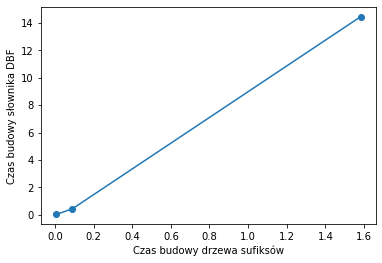

In [32]:
x = [suffix1_time, suffix2_time, suffix3_time]
y = [kmr1_time, kmr2_time, kmr3_time]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y, marker='o')

ax.set_xlabel('Czas budowy drzewa sufiksów')
ax.set_ylabel('Czas budowy słownika DBF')

plt.show()

Możemy stwierdzić, że otrzymana zależność nie jest liniowa.

## Porównanie rozmiaru słownika względem plików źródłowych

### Pierwszy plik testowy

In [33]:
file_path = '1997_714.txt'
file_text = read_file(file_path)
dbf = Kmr().kmr(file_text)

Rozmiar pliku:

In [34]:
file1_size = os.path.getsize(file_path)
print(file1_size)

254133


Rozmiar słownika:

In [35]:
dbf1_size = get_deep_size(dbf)
print(dbf1_size)

377392132


### Drugi plik testowy

In [36]:
file_path = 'romeo-i-julia-700.txt'
file_text = read_file(file_path)
dbf = Kmr().kmr(file_text)

Rozmiar pliku:

In [37]:
file2_size = os.path.getsize(file_path)
print(file2_size)

14208


Rozmiar słownika:

In [38]:
dbf2_size = get_deep_size(dbf)
print(dbf2_size)

16434964


### Trzeci plik testowy

In [39]:
file_path = 'zad6'
file_text = read_file(file_path)
dbf = Kmr().kmr(file_text)

Rozmiar pliku:

In [40]:
file3_size = os.path.getsize(file_path)
print(file3_size)

947


Rozmiar słownika:

In [41]:
dbf3_size = get_deep_size(dbf)
print(dbf3_size)

672208


### Podsumowanie porównania rozmiarów

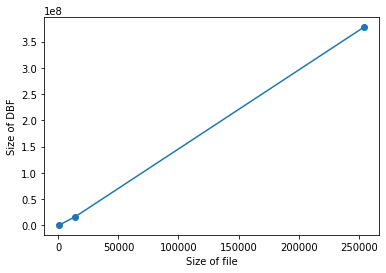

In [42]:
x = [file1_size, file2_size, file3_size]
y = [dbf1_size, dbf2_size, dbf3_size]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y, marker='o')

ax.set_xlabel('Size of file')
ax.set_ylabel('Size of DBF')

plt.show()

Możemy stwierdzić, że otrzymana zależnośc jest liniowa.

## Porównanie czasów wyszukiwanie wzorca

### Pierwszy plik testowy

In [43]:
file_path = '1997_714.txt'
file_text = read_file(file_path)
pattern = 'zasada'

In [44]:
%%timeit -r 1 -n 1 -o
found = Kmr().search(file_text, pattern)
print(len(found), found)

25 [4952, 5283, 5530, 10068, 11226, 12632, 13704, 14056, 14374, 15749, 38033, 38153, 41796, 44224, 57397, 59849, 60022, 68573, 68699, 70233, 70769, 77760, 77823, 78306, 78371]
2.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 2.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [45]:
res = _
kmr1_search_time = res.best

In [46]:
%%timeit -r 1 -n 1 -o
found = kmp(file_text, pattern)
print(len(found), found)

25 [4957, 5288, 5535, 10073, 11231, 12637, 13709, 14061, 14379, 15754, 38038, 38158, 41801, 44229, 57402, 59854, 60027, 68578, 68704, 70238, 70774, 77765, 77828, 78311, 78376]
43.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 43.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [47]:
res = _
kmp1_search_time = res.best

### Drugi plik testowy

In [48]:
file_path = 'romeo-i-julia-700.txt'
file_text = read_file(file_path)
pattern = 'BENWOLIO'

In [49]:
%%timeit -r 1 -n 1 -o
found = Kmr().search(file_text, pattern)
print(len(found), found)

24 [356, 4451, 4681, 6771, 7310, 8341, 8439, 8878, 9097, 9187, 9340, 9438, 9506, 9617, 10246, 10340, 10910, 11107, 11225, 11488, 11638, 12086, 12434, 12554]
205 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 205 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [50]:
res = _
kmr2_search_time = res.best

In [51]:
%%timeit -r 1 -n 1 -o
found = kmp(file_text, pattern)
print(len(found), found)

24 [363, 4458, 4688, 6778, 7317, 8348, 8446, 8885, 9104, 9194, 9347, 9445, 9513, 9624, 10253, 10347, 10917, 11114, 11232, 11495, 11645, 12093, 12441, 12561]
1.89 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 1.89 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [52]:
res = _
kmp2_search_time = res.best

### Trzeci plik testowy

In [53]:
file_path = 'zad6'
file_text = read_file(file_path)
pattern = 'DBF'

In [54]:
%%timeit -r 1 -n 1 -o
found = Kmr().search(file_text, pattern)
print(len(found), found)

5 [113, 245, 300, 401, 484]
3.88 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 3.88 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [55]:
res = _
kmr3_search_time = res.best

In [56]:
%%timeit -r 1 -n 1 -o
found = kmp(file_text, pattern)
print(len(found), found)

5 [115, 247, 302, 403, 486]
216 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 216 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [57]:
res = _
kmp3_search_time = res.best

### Podsumowanie porównania 

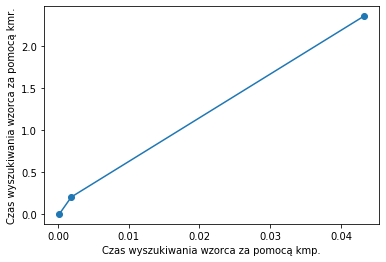

In [58]:
x = [kmp1_search_time, kmp2_search_time, kmp3_search_time]
y = [kmr1_search_time, kmr2_search_time, kmr3_search_time]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y, marker='o')

ax.set_xlabel('Czas wyszukiwania wzorca za pomocą kmp.')
ax.set_ylabel('Czas wyszukiwania wzorca za pomocą kmr.')

plt.show()

Możemy stwierdzić, że otrzymana zależność nie jest liniowa.

## Czy kompletna przebudowa DBF jest konieczna do wyszukania kolejnego wzorca?

Pokazaliśmy, że budowa słownika DBF jest czasochłonna. Dotychczas, chcąc wyszukać wzorzec w tekście, sklejaliśmy go z tekstem w sposób *pattern#text* i liczyliśmy dla tak otrzymanageo ciągu słownik DBF. Pokażemy, że wystąpienia wzorca w tekście są możliwe do znalezienia wyłącznie zapomocą słownika DBF zbudowanego dla tekstu.

W tym celu wykorzystam tablicę *Pos*, oraz wyszukiwanie binarne. Zauważmy, że tablica *Pos* jest uporządkowana leksykograficznie względem opisywanych przez nią składowych. Pozwala nam to na uzyskanie numeru danej składowej w czasie logarytmicznym. 

### Implementacja wyszukiwania

In [59]:
class SmartKmr(Kmr):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def binary_search(self, highest_pow, pattern):
        entries = []
        for k,v in self.entries[highest_pow].items():
            if v+len(pattern) < len(self.text):
                entries.append((k,v))
            
        p, q = 0, len(entries)
        while p < q:
            s = (p+q)//2
            k,v = entries[s]
            if self.text[v:v+len(pattern)] < pattern:
                p = s+1
            else:
                q = s
        return entries[p][0]
                
    def search(self, text, pattern):
        self.kmr(text)
        self.text = text
        result = []
        
        highest_pow = 2 ** SmartKmr.get_max_factor(len(pattern))

        offset = len(pattern)-highest_pow
    
        pattern_prefix = pattern[:highest_pow]
        pattern_suffix = pattern[-highest_pow:]

        prefix_name = self.binary_search(highest_pow, pattern_prefix)
        suffix_name = self.binary_search(highest_pow, pattern_suffix)
            
        result = []
        for i in range(len(self.names[highest_pow])-offset):
            if self.names[highest_pow][i] == prefix_name and \
            self.names[highest_pow][i+offset] == suffix_name:
                result.append(i)

        return result

### Pomiar czasu wykonania

In [60]:
smart_kmr = SmartKmr()
kmr = Kmr()

In [61]:
file_path = '1997_714.txt'
file_text = read_file(file_path)
pattern = 'zasada'

In [62]:
%%timeit -r 1 -n 1 -o
found = kmr.search(file_text, pattern)
print(len(found), found)

25 [4952, 5283, 5530, 10068, 11226, 12632, 13704, 14056, 14374, 15749, 38033, 38153, 41796, 44224, 57397, 59849, 60022, 68573, 68699, 70233, 70769, 77760, 77823, 78306, 78371]
2.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 2.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [63]:
res = _
Kmr1_search_time = res.best

In [64]:
%%timeit -r 1 -n 1 -o
found = smart_kmr.search(file_text, pattern)
print(len(found), found)

25 [4952, 5283, 5530, 10068, 11226, 12632, 13704, 14056, 14374, 15749, 38033, 38153, 41796, 44224, 57397, 59849, 60022, 68573, 68699, 70233, 70769, 77760, 77823, 78306, 78371]
14.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 14.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [65]:
res = _
SmartKmr1_search_time = res.best

In [66]:
pattern = 'artykuł'

In [67]:
%%timeit -r 1 -n 1 -o
found = kmr.search(file_text, pattern)
print(len(found), found)

15 [39210, 39436, 93366, 93426, 93561, 97285, 104141, 110186, 158607, 161581, 162788, 185631, 200530, 200628, 202696]
2.51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 2.51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [68]:
res = _
Kmr2_search_time = res.best

In [69]:
%%timeit -r 1 -n 1 -o
found = smart_kmr.search(file_text, pattern)
print(len(found), found)

15 [39210, 39436, 93366, 93426, 93561, 97285, 104141, 110186, 158607, 161581, 162788, 185631, 200530, 200628, 202696]
87.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 87.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [70]:
res = _
SmartKmr2_search_time = res.best

In [71]:
pattern = 'Art.'

In [72]:
%%timeit -r 1 -n 1 -o
found = kmr.search(file_text, pattern)
print(len(found), found)

58 [669, 959, 1620, 2557, 5496, 5863, 10454, 11076, 14460, 16031, 16351, 23417, 26825, 27412, 28093, 30563, 31204, 31592, 32432, 33538, 36091, 37729, 38541, 41084, 42834, 48734, 50681, 53694, 55016, 56761, 57892, 59322, 60703, 61512, 62418, 63459, 66922, 67505, 68107, 68946, 70604, 71033, 71547, 72092, 73200, 74625, 75275, 75655, 76437, 77121, 77367, 78771, 79782, 84512, 85576, 86116, 88606, 89238]
2.68 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 2.68 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [73]:
res = _
Kmr3_search_time = res.best

In [74]:
%%timeit -r 1 -n 1 -o
found = smart_kmr.search(file_text, pattern)
print(len(found), found)

58 [669, 959, 1620, 2557, 5496, 5863, 10454, 11076, 14460, 16031, 16351, 23417, 26825, 27412, 28093, 30563, 31204, 31592, 32432, 33538, 36091, 37729, 38541, 41084, 42834, 48734, 50681, 53694, 55016, 56761, 57892, 59322, 60703, 61512, 62418, 63459, 66922, 67505, 68107, 68946, 70604, 71033, 71547, 72092, 73200, 74625, 75275, 75655, 76437, 77121, 77367, 78771, 79782, 84512, 85576, 86116, 88606, 89238]
79 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 79 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [75]:
res = _
SmartKmr3_search_time = res.best

### Podsumowanie

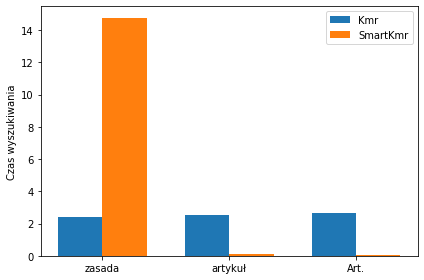

In [76]:
labels = ['zasada', 'artykuł', 'Art.']
kmr_times = [Kmr1_search_time, Kmr2_search_time, Kmr3_search_time]
smartkmr_times = [SmartKmr1_search_time, SmartKmr2_search_time, SmartKmr3_search_time]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, kmr_times, width, label='Kmr')
rects2 = ax.bar(x + width/2, smartkmr_times, width, label='SmartKmr')

ax.set_ylabel('Czas wyszukiwania')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()